In [1]:
from sklearn import datasets
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./kospi.csv")

In [3]:
df

,Date,Open,High,Low,Close,Volume
0,19-Sep-17,2419.30,2422.05,2411.68,2416.05,254585000
1,18-Sep-17,2390.58,2418.24,2389.65,2418.21,273477000
2,15-Sep-17,2368.44,2386.07,2365.37,2386.07,298738000
3,14-Sep-17,2365.54,2377.66,2358.43,2377.66,314262000
4,13-Sep-17,2370.54,2373.61,2360.17,2360.18,318871000
5,12-Sep-17,2372.02,2372.45,2359.12,2365.47,333573000
6,11-Sep-17,2354.86,2369.72,2354.35,2359.08,243612000
7,8-Sep-17,2350.19,2351.73,2340.63,2343.72,214592000
8,7-Sep-17,2328.94,2349.79,2328.92,2346.19,277036000
9,6-Sep-17,2324.84,2325.56,2314.31,2319.82,252681000


In [4]:
df.shape

(249, 6)

In [5]:
X_train = df['Open']

In [6]:
Y_train = df['Close']

In [7]:
X_train.shape

(249,)

In [8]:
X_train = X_train.reshape(249,1)

/Users/jason/dev/mlenv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [9]:
Y_train = Y_train.reshape(249,1)

/Users/jason/dev/mlenv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [10]:
X_train.shape  # the size of X_train

(249, 1)

In [11]:
lr = linear_model.LinearRegression()

# Train the model using the training sets
lr.fit(X_train, Y_train)# Make predictions using the testing set

/Users/jason/dev/mlenv/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
X_test = np.array([[2420.82], [2412.01]])
# Y_test = np.array([[2414.01]])

In [13]:
# Make predictions using the testing set
Y_pred = lr.predict(X_test)

In [14]:
Y_pred

array([[ 2421.02189256],
       [ 2412.21043511]])

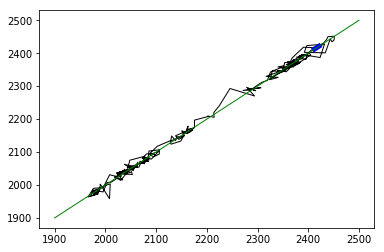

In [15]:
# Plot outputs
plt.plot(X_train, Y_train, color='black', linewidth=1)
plt.plot(X_test, Y_pred, color='blue', linewidth=5)
plt.plot([1900, 2500], [1900, 2500], color='green', linewidth=1)

plt.show()

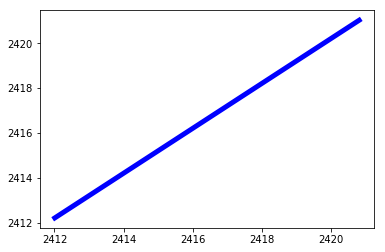

In [16]:
plt.plot(X_test, Y_pred, color='blue', linewidth=5)
plt.show()